<a href="https://colab.research.google.com/github/fgassuncao/MO412/blob/main/assignment_4/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fábio Gomes de Assunção 233664
## Assignment 4 - BFS - Initial Node 3, FG.

## Imports

In [1]:
import numpy as np
import networkx as nx #imports networkX stuff
import pandas as pd
from collections import OrderedDict

## Reading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = "/content/drive/MyDrive/Colab Notebooks/data_MO412/4/"

In [4]:
df_links = pd.read_csv(f"{path}links.csv",header=None)

In [5]:
df_links

,0,1
0,7,13
1,13,12
2,5,7
3,7,5
4,12,6
5,11,12
6,6,1
7,5,9
8,5,1
9,1,3


In [6]:
df_nodes = pd.read_csv(f"{path}nodes.csv",header=None)

In [7]:
df_nodes

,0,1,2,3
0,AC,1,parent,distance
1,AI,2,parent,distance
2,FG,3,parent,distance
3,GO,4,parent,distance
4,LO,5,parent,distance
5,LG,6,parent,distance
6,LB,7,parent,distance
7,MA,8,parent,distance
8,MF,9,parent,distance
9,MM,10,parent,distance


### Making the network

In [8]:
G=nx.from_pandas_edgelist(df_links.iloc[:,:2], 0, 1, create_using=nx.Graph)

In [9]:
print (len(G.nodes()))
G.nodes()

15


NodeView((7, 13, 12, 5, 6, 11, 1, 9, 3, 2, 10, 4, 8, 14, 15))

In [10]:
G.edges() 

EdgeView([(7, 13), (7, 5), (13, 12), (12, 6), (12, 11), (5, 9), (5, 1), (5, 15), (6, 1), (11, 3), (11, 2), (1, 3), (9, 4), (3, 2), (3, 10), (2, 8), (2, 14), (4, 8), (8, 15)])

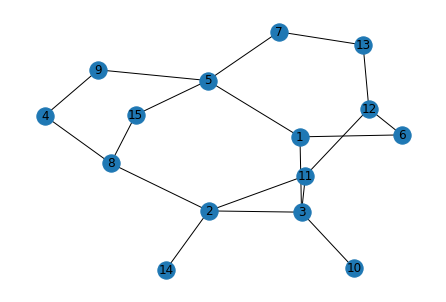

In [11]:
nx.draw(G,with_labels=True)

### BFS routines

In [12]:
def flaten(q_temp):
  return [item for sublist in q_temp for item in sublist]

def unique(u):
  indexes = np.unique(u, return_index=True)[1]
  u2 = [u[index] for index in sorted(indexes)]
  return u2

In [13]:
def bfs(init_node: int, G):

  distance = 0
  parent = {}
  Q = []

  parent[init_node] = None

  Q.append(init_node)
  G.nodes[init_node]['distance'] = distance

  u = []
  while True:

    u = Q.copy()
    distance+=1

    for node in u:
      for neig in G.neighbors(node):
        if neig not in parent:
          Q.append(neig)
          parent[neig] = node
          G.nodes[neig]['distance'] = distance
    
    # print(Q)

    u = unique(u)
    if len(u) == len(Q):
      return Q, parent

In [14]:
aa, parent = bfs(1, G)

In [15]:
# # u = [3,5,6]
# Q = [1]

# parent = {}
# parent[1] = None
# # parent[3] = 1
# # parent[5] = 1
# # parent[6] = 1

In [16]:
nodes_dist = {}
for node in G.nodes:
  nodes_dist[node] = G.nodes[node]['distance']

dists = list(OrderedDict(sorted(nodes_dist.items())).values())

parents = list(OrderedDict(sorted(parent.items())).values())

In [17]:
df_nodes[3] = dists
df_nodes[2] = parents
df_nodes[2].fillna(0, inplace=True)
df_nodes[2] = df_nodes[2].astype(int).values
df_nodes

,0,1,2,3
0,AC,1,0,0
1,AI,2,3,2
2,FG,3,1,1
3,GO,4,9,3
4,LO,5,1,1
5,LG,6,1,1
6,LB,7,5,2
7,MA,8,15,3
8,MF,9,5,2
9,MM,10,3,2


In [18]:
df_nodes.to_csv(f"{path}output.csv")